## Dataset and Problem Introduction

In this analysis, we explore <strong>a content-based book recommendation system</strong> that determines which books are close to each other based on how similar the discussed topics are. The books used are all authored by Charles Darwin.

Data Source: http://www.gutenberg.org/
<br>Reference: https://www.datacamp.com/

In [1]:
# Import library
import glob

# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
files.sort()
files

['datasets\\Autobiography.txt',
 'datasets\\CoralReefs.txt',
 'datasets\\DescentofMan.txt',
 'datasets\\DifferentFormsofFlowers.txt',
 'datasets\\EffectsCrossSelfFertilization.txt',
 'datasets\\ExpressionofEmotionManAnimals.txt',
 'datasets\\FormationVegetableMould.txt',
 'datasets\\FoundationsOriginofSpecies.txt',
 'datasets\\GeologicalObservationsSouthAmerica.txt',
 'datasets\\InsectivorousPlants.txt',
 'datasets\\LifeandLettersVol1.txt',
 'datasets\\LifeandLettersVol2.txt',
 'datasets\\MonographCirripedia.txt',
 'datasets\\MonographCirripediaVol2.txt',
 'datasets\\MovementClimbingPlants.txt',
 'datasets\\OriginofSpecies.txt',
 'datasets\\PowerMovementPlants.txt',
 'datasets\\VariationPlantsAnimalsDomestication.txt',
 'datasets\\VolcanicIslands.txt',
 'datasets\\VoyageBeagle.txt']

## Loading book contents
<p>First we load the content of these books into Python and do some basic pre-processing to facilitate the downstream analyses. We also store the titles for these books for future reference and print their respective length to get a gauge for their contents. Note: a collection of texts is referred to as <strong>a corpus</strong></p>

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    data = re.sub('[\W_]+', ' ', f.read())
    # Store the texts and titles of the books in two separate lists
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))
    
# Print the length, in characters, of each book
[len(t) for t in txts]

[123231,
 496068,
 1776539,
 617088,
 913713,
 624232,
 335920,
 523021,
 797401,
 901406,
 1047518,
 1010643,
 767492,
 1660866,
 298319,
 916267,
 1093567,
 1043499,
 341447,
 1149574]

## Find "On the Origin of Species"
<p>For the next parts of this analysis we check the results returned by our method for a given book. For consistency, we refer to Darwin's most famous book: "<em>On the Origin of Species</em>."</p>

In [3]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    if(titles[i]=="OriginofSpecies"):
        ori = i
 
# Print the stored index
print(str(ori))

15


## Tokenizing the corpus
<p>Next, we transform the corpus into a format that is easier to deal with for the later analyses. To do this we tokenize our corpus, i.e., transform each text into a list of the individual words (called tokens) it is made of. To check the output of our process, we print the first 20 tokens of "<em>On the Origin of Species</em>".</p>

In [4]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens for the "On the Origin of Species" book
texts[ori][0:20]

['on',
 'origin',
 'species',
 'but',
 'with',
 'regard',
 'material',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'this',
 'can',
 'perceive',
 'events',
 'are',
 'brought',
 'about']

## Stemming of the tokenized corpus
<p>In <em>On the Origin of Species</em>, Charles Darwin uses different words to refer to similar concepts. For example, the concept of selection is also described by words such as <em>selection</em>, <em>selective</em>, <em>select</em> or <em>selects</em>. This dilutes the weight given to this concept in the book and potentially biases the results of the analysis.</p>
<p>To solve this issue, it is a common practice to use a <strong>stemming process</strong>, which groups together the inflected forms of a word so they can be analysed as a single item: <strong>the stem</strong>. In our <em>On the Origin of Species</em> example, the words related to the concept of selection are gathered under the <em>select</em> stem.</p>
<p>As we are analysing 20 full books, the stemming algorithm can take several minutes to run, so in order to make the process faster, we directly load the final results from a pickle file and review the method used to generate it.</p>

In [5]:
import pickle

# Load the stemmed tokens list from the pregenerated pickle file
texts_stem = pickle.load( open( "datasets/texts_stem.p", "rb" ) )

# Print the 20 first stemmed tokens from the "On the Origin of Species" book
texts_stem[ori][0:20]

['on',
 'origin',
 'speci',
 'but',
 'with',
 'regard',
 'materi',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'thi',
 'can',
 'perceiv',
 'event',
 'are',
 'brought',
 'about']

## Building a bag-of-words model
<p>Now that we have transformed the texts into stemmed tokens, we build models that will be useable by downstream algorithms.</p>
<p>First, we create a universe of all words contained in our corpus of Charles Darwin's books, which we call <em>a dictionary</em>. Then, using the stemmed tokens and the dictionary, we create <strong>bag-of-words models</strong> (BoW) of each of our texts. The BoW models represent our books as a list of all uniques tokens they contain associated with their respective number of occurrences. </p>
<p>To better understand the structure of such a model, we print the five first elements of one of the "<em>On the Origin of Species</em>" BoW model.</p>

In [6]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]


# Print the first five elements of the On the Origin of species' BoW model
bows[ori][0:5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

## Most common words of a given book
<p>In order to better understand how the model has been generated and visualize its content, we transform it into a DataFrame and display the 10 most common stems for the book "<em>On the Origin of Species</em>".</p>

In [7]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[ori])

# Add the column names to the DataFrame
df_bow_origin.columns = ["index", "occurrences"]

# Add a column containing the token corresponding to the dictionary index
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values(by="occurrences", ascending=False).head(10)

,index,occurrences,token
748,1168,2023,have
1119,1736,1558,on
1489,2288,1543,speci
892,1366,1480,it
239,393,1362,by
1128,1747,1201,or
125,218,1140,are
665,1043,1137,from
1774,2703,1000,with
1609,2452,962,thi


<p>If it wasn't for the presence of the stem "<em>speci</em>", we would have a hard time guessing this BoW model came from the <em>On the Origin of Species</em> book. The most recurring words are, apart from few exceptions, very common and unlikely to carry any information peculiar to the given book. Therefore, we need to use an additional step in order to determine which tokens are the most specific to a book.</p>

## The tf-idf model
<p>We use a <strong>tf-idf model</strong> (term frequency–inverse document frequency) to determine which tokens are the most specific to a book. This model defines the importance of each word depending on how frequent it is in this text and how infrequent it is in all the other documents. As a result, a high tf-idf score for a word will indicate that this word is specific to this text.</p>

In [8]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
model[bows[ori]]

[(8, 0.00020383224047642202),
 (21, 0.0005716037746542094),
 (23, 0.0017118699041370883),
 (27, 0.0006458270601429994),
 (28, 0.0025678048562056324),
 (31, 0.0008559349520685442),
 (35, 0.00101497410751472),
 (36, 0.00101497410751472),
 (51, 0.000886740665721021),
 (54, 0.00202994821502944),
 (56, 0.0023757190244598344),
 (57, 0.00010191612023821101),
 (63, 0.0027544680933525786),
 (64, 0.000509580601191055),
 (66, 0.00020383224047642202),
 (67, 0.0023757190244598344),
 (68, 0.00202994821502944),
 (75, 0.0013772340466762893),
 (76, 0.0004433703328605105),
 (78, 0.004171843479607349),
 (80, 0.0020859217398036746),
 (83, 0.00857405661981314),
 (84, 0.000509580601191055),
 (88, 0.002445986885717064),
 (89, 0.0033632319678609636),
 (90, 0.000886740665721021),
 (91, 0.0016747506839411234),
 (94, 0.000886740665721021),
 (95, 0.0004433703328605105),
 (96, 0.003546962662884084),
 (97, 0.0016306579238113761),
 (102, 0.037686478293143394),
 (104, 0.000917245082143899),
 (106, 0.00141737538625477

<p>Now we transform the results into a more readable version and display the 10 most specific words for the "<em>On the Origin of Species</em>" book  (i.e., the 10 words with the highest tf-idf score).</p>

In [9]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns=["id", "score"]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[i] for i in list(df_tfidf["id"])]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values(by="score", ascending=False).head(10)

,id,score,token
878,2164,0.327414,select
3106,10108,0.203908,pigeon
128,369,0.197721,breed
2988,9396,0.167496,migrat
945,2325,0.148186,steril
284,752,0.145990,domest
503,1255,0.128272,hybrid
370,966,0.127534,fertil
3889,16210,0.124392,rtner
3540,12715,0.121197,naturalis


## Computing distance between texts
<p>Now that we have a model associating tokens to how specific they are to each book, we can measure how related books are between each other.</p>
<p>For this, we use a measure of similarity called <strong>cosine similarity</strong> and visualize the results as a distance matrix, i.e., a matrix showing all pairwise distances between Darwin's books.</p>

In [10]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a DataFrame
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the DataFrame
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049467,0.080428,0.066482,0.077184,0.088723,0.040678,0.059271,0.030562,0.014878,0.396709,0.217129,0.005686,0.008483,0.022856,0.099991,0.016247,0.049018,0.038556,0.183507
CoralReefs,0.049467,1.000000,0.009480,0.001952,0.001923,0.004999,0.029432,0.022096,0.061027,0.002276,0.030965,0.017558,0.006324,0.010579,0.001518,0.039089,0.002707,0.011586,0.057514,0.267749
DescentofMan,0.080428,0.009480,1.000000,0.072761,0.029968,0.148670,0.027055,0.135775,0.009698,0.009404,0.059684,0.080314,0.053506,0.043275,0.005146,0.267554,0.011357,0.232841,0.007882,0.123917
DifferentFormsofFlowers,0.066482,0.001952,0.072761,1.000000,0.391834,0.006474,0.010585,0.040104,0.002846,0.007502,0.015933,0.046523,0.009405,0.005484,0.008151,0.128909,0.018964,0.050023,0.002611,0.013124
EffectsCrossSelfFertilization,0.077184,0.001923,0.029968,0.391834,1.000000,0.006844,0.032262,0.040288,0.002246,0.006777,0.019504,0.046504,0.003212,0.002962,0.014932,0.146441,0.039770,0.055132,0.002178,0.017140
ExpressionofEmotionManAnimals,0.088723,0.004999,0.148670,0.006474,0.006844,1.000000,0.020985,0.047202,0.005217,0.011475,0.064873,0.048886,0.016825,0.029897,0.005913,0.062979,0.011317,0.083847,0.005561,0.098961
FormationVegetableMould,0.040678,0.029432,0.027055,0.010585,0.032262,0.020985,1.000000,0.021470,0.067989,0.035589,0.027916,0.023620,0.019866,0.023984,0.038820,0.049258,0.040182,0.033147,0.059407,0.097908
FoundationsOriginofSpecies,0.059271,0.022096,0.135775,0.040104,0.040288,0.047202,0.021470,1.000000,0.028028,0.006023,0.057820,0.054782,0.007618,0.010883,0.003973,0.322405,0.008788,0.194533,0.017590,0.089132
GeologicalObservationsSouthAmerica,0.030562,0.061027,0.009698,0.002846,0.002246,0.005217,0.067989,0.028028,1.000000,0.006879,0.028551,0.012104,0.009687,0.024738,0.002043,0.058046,0.003491,0.014389,0.373249,0.260141
InsectivorousPlants,0.014878,0.002276,0.009404,0.007502,0.006777,0.011475,0.035589,0.006023,0.006879,1.000000,0.005967,0.016518,0.019214,0.020023,0.249814,0.014961,0.023056,0.010522,0.008544,0.014776


## The book most similar to "On the Origin of Species"

Text(0.5, 1.0, "Most similar books to 'On the Origin of Species'")

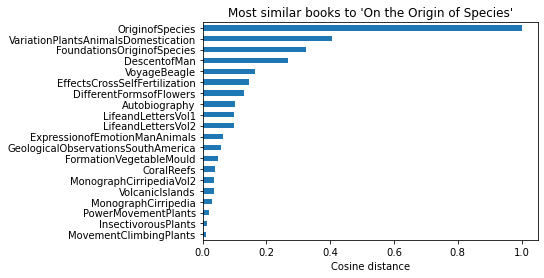

In [11]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import the needed functions from matplotlib
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df["OriginofSpecies"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'On the Origin of Species'")


## Which books have similar content?
<p>Now we want to have a better understanding of the big picture and see how Darwin's books are generally related to each other (in terms of topics discussed). To do this, we represent the whole similarity matrix as a dendrogram, which is a standard tool to display such data. <strong>This last approach displays all the information about book similarities at once.</strong> For example, we can find a book's closest relative as well as visualizing which groups of books have similar topics (e.g., the cluster about Charles Darwin personal life with his autobiography and letters).</p>

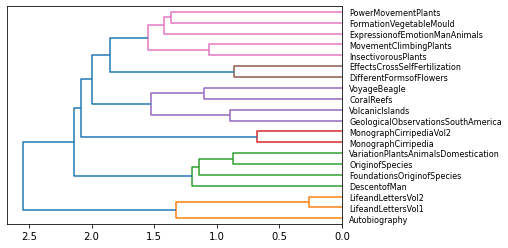

In [12]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=sim_df.index,  orientation="left")